In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Central limit theorem example - Dice rolling

Expected mean and standard deviation for classical die rolling:

$$\mu = \frac{1}{6} \sum_{i=1}^6 i = 3.5, \hspace{1cm} \sigma = \sqrt{ \frac{1}{6}\sum_{i=1}^6 (i - \mu)^2 } = 1.71 $$

In [11]:
MeanExpected = 3.5
DevExpected = np.sqrt( 1/6 * sum( [(i-3.5)**2 for i in np.arange(1,7)] ) )
print('We expect mean {} with deviation {}.'.format(MeanExpected, round(DevExpected, 2)))

We expect mean 3.5 with deviation 1.71.


In [13]:
# Roll several dice and return sum of result
def roll(nDice):
    dice = np.random.choice(np.arange(1,7),nDice)
    return sum(dice)

In [14]:
# For example - rolling 2 dice 10 times:
[roll(2) for i in np.arange(10)]

[8, 11, 6, 3, 10, 4, 3, 7, 9, 10]

In [33]:
# Creating a large data set - rolling 6 dice 10,000 times !
nDice = 6
data = np.array([roll(nDice) for i in range(10000)])

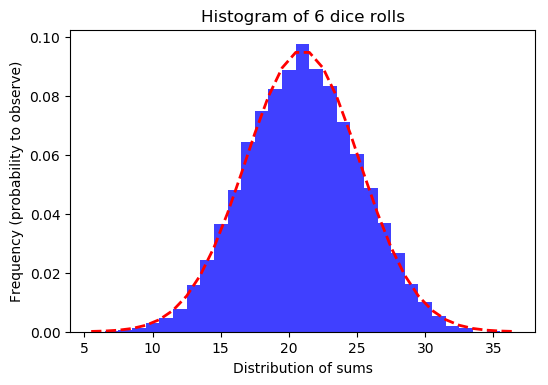

In [43]:
# Plot a histogram
plt.figure(num=None, figsize=(6, 4), dpi=100)
n, bins, patches = plt.hist( data, 
                             bins=np.arange(nDice-0.5,nDice*6+1.5,1), 
                             normed=1, 
                             facecolor='blue', 
                             alpha=0.75 )

# Gaussian fit - using theoretical Mean and Dev
from scipy.stats import norm
import matplotlib.mlab as mlab

y = mlab.normpdf(bins, nDice*MeanExpected, np.sqrt(nDice)*DevExpected)
plt.plot(bins, y, 'r--', linewidth=2)

plt.xlabel('Distribution of sums')
plt.ylabel('Frequency (probability to observe)')
plt.title('Histogram of '+str(nDice)+' dice rolls')
plt.show()